In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Patrick Ilunga/Crop_recommendation.csv")

In [3]:
df.head(112)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
107,89,60,19,25.191924,66.690290,5.913665,78.066396,maize
108,76,44,17,20.416831,62.554248,5.855442,65.277985,maize
109,67,60,25,24.921622,66.786274,5.750255,109.216228,maize
110,70,44,19,23.316891,73.454154,5.852607,94.297128,maize


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:


# Datatypes of Attributes
df.info

<bound method DataFrame.info of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [6]:
# Check the unique values in dataset
df.apply(lambda x: len(x.unique()))

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [7]:


df.isnull().sum()



N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:


df['label'].unique()



array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:


df['label'].value_counts()



rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<AxesSubplot:xlabel='N', ylabel='Density'>

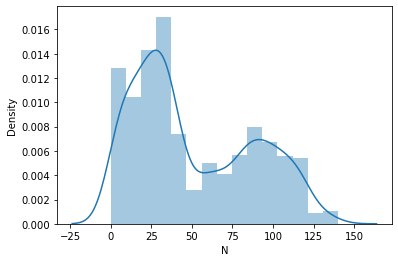

In [10]:
sns.distplot(df['N'])

<AxesSubplot:>

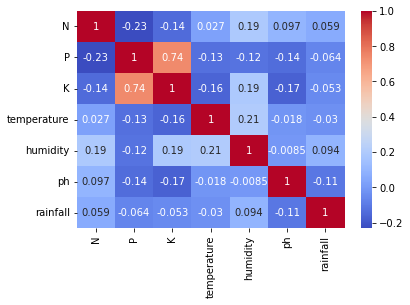

In [11]:


sns.heatmap(df.corr(), annot=True, cmap='coolwarm')



In [12]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [13]:
X

array([[ 90.        ,  42.        ,  43.        , ...,  82.00274423,
          6.50298529, 202.9355362 ],
       [ 85.        ,  58.        ,  41.        , ...,  80.31964408,
          7.03809636, 226.6555374 ],
       [ 60.        ,  55.        ,  44.        , ...,  82.3207629 ,
          7.84020714, 263.9642476 ],
       ...,
       [118.        ,  33.        ,  30.        , ...,  67.22512329,
          6.36260785, 173.3228386 ],
       [117.        ,  32.        ,  34.        , ...,  52.12739421,
          6.75879255, 127.1752928 ],
       [104.        ,  18.        ,  30.        , ...,  60.39647474,
          6.77983261, 140.9370415 ]])

In [14]:
y

array(['rice', 'rice', 'rice', ..., 'coffee', 'coffee', 'coffee'],
      dtype=object)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
#regression logistique 

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print("Logistic Regression's Accuracy :", acc)




Logistic Regression's Accuracy : 0.9606060606060606


In [18]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=10)
score

array([0.95      , 0.95909091, 0.95909091, 0.97272727, 0.95909091,
       0.97272727, 0.97727273, 0.95      , 0.95454545, 0.95      ])

In [19]:


# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.90      0.90      0.90        31
    chickpea       1.00      1.00      1.00        34
     coconut       0.93      1.00      0.96        26
      coffee       1.00      1.00      1.00        29
      cotton       1.00      0.96      0.98        28
      grapes       1.00      1.00      1.00        30
        jute       0.87      0.87      0.87        31
 kidneybeans       0.96      1.00      0.98        26
      lentil       0.83      0.86      0.84        22
       maize       0.96      1.00      0.98        27
       mango       0.97      1.00      0.98        28
   mothbeans       0.97      0.81      0.88        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       0.97      1.00      0.98        30
      orange       1.00      0.94      0.97        34
      papaya       0.97    

In [20]:

#arbre de decision
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=100, random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

model1 =print("Decision Tree Classification's Accuracy :", acc)


#random forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

model2=print("Random Forest Classification's Accuracy :", acc)

#vector machine 

#from sklearn.svm import SVC
#classifier = SVC(kernel = 'linear', random_state = 0)
#classifier.fit(X_train, y_train)

# Predicting the Test set results
#y_pred = classifier.predict(X_test)

# Accuracy 
#from sklearn.metrics import accuracy_score
#acc = accuracy_score(y_test, y_pred)

#print("Support Vector Machine's Accuracy :", acc)

#Kernel SVM
#from sklearn.svm import SVC
#classifier = SVC(kernel = 'rbf', random_state = 0)
#classifier.fit(X_train, y_train)

# Predicting the Test set results
#y_pred = classifier.predict(X_test)

# Accuracy 
#from sklearn.metrics import accuracy_score
#acc = accuracy_score(y_test, y_pred)

#print("Kernel SVM's Accuracy :", acc)

#K-Nearest Neighbours

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

model3=print("K-Nearest Neighbours's Accuracy :", acc)


Decision Tree Classification's Accuracy : 0.9803030303030303
Random Forest Classification's Accuracy : 0.9954545454545455
K-Nearest Neighbours's Accuracy : 0.9621212121212122


In [23]:
print(classifier.predict(sc.transform([[0,3,2,0.191924,1.690290,0.913665,0.066396]])))


['mothbeans']


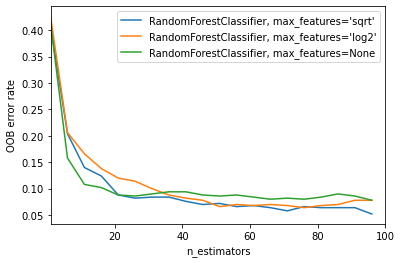

In [22]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 123

# Generate a binary classification dataset.
X, y = make_classification(
    n_samples=500,
    n_features=25,
    n_clusters_per_class=1,
    n_informative=15,
    random_state=RANDOM_STATE,
)

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 1
max_estimators = 100

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()




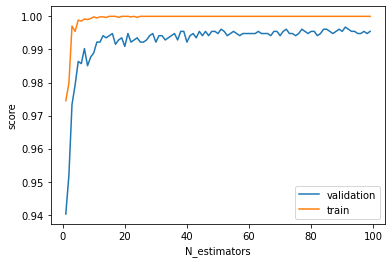

In [23]:
#utilisation de la courbe de validation
from sklearn.model_selection import validation_curve
from numpy import arange
# = RandomForestClassifier()
i = arange(1, 100)
train_score, val_score = validation_curve(RandomForestClassifier(), X_train, y_train, param_name='n_estimators', param_range=i, cv=5)
#affichage des courbes de validation et train
plt.plot(i, val_score.mean(axis=1), label ='validation')
plt.plot(i, train_score.mean(axis=1), label='train')
plt.xlabel('N_estimators')
plt.ylabel('score')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


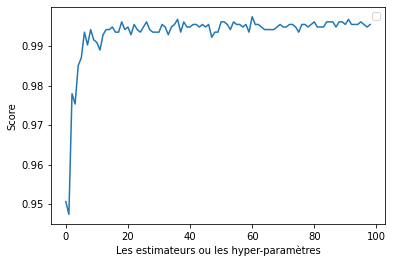

In [24]:
from sklearn.ensemble import RandomForestClassifier
val_score = []
for i in range(1, 100):
    score = cross_val_score(RandomForestClassifier(i), X_train, y_train, cv=10).mean()
    val_score.append(score)
plt.plot(val_score)
plt.xlabel('Les estimateurs ou les hyper-paramètres')
plt.ylabel('Score')
plt.legend()
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV
#définition du dictionnaire des paramètres:
grid_params ={
    'n_estimators': np.arange(1, 100),
    'criterion' : ['entropy']
}
grid = GridSearchCV(RandomForestClassifier(), grid_params, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'],
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [26]:
grid.best_score_

0.9967532467532468

In [27]:
grid.best_params_

{'criterion': 'entropy', 'n_estimators': 61}

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

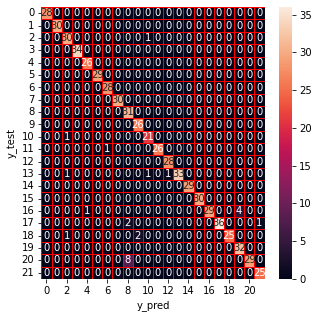

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt =".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

Training Accuracy:-  0.962987012987013
Testing Accuracy:-  0.9621212121212122


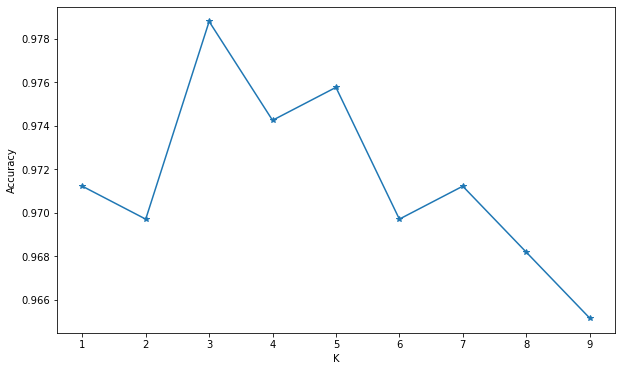

In [30]:
from sklearn.neighbors import KNeighborsClassifier
score=[]
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i,weights='uniform')
    knn.fit(X_train,y_train)
    score.append(knn.score(X_test,y_test))
knn=KNeighborsClassifier(n_neighbors=10,weights='uniform')
knn.fit(X_train,y_train)

print('Training Accuracy:- ', knn.score(X_train,y_train))
print('Testing Accuracy:- ',knn.score(X_test,y_test))


plt.figure(figsize=(10,6))
plt.plot(range(1,10),score,marker='*')
plt.xlabel('K')
plt.ylabel('Accuracy');

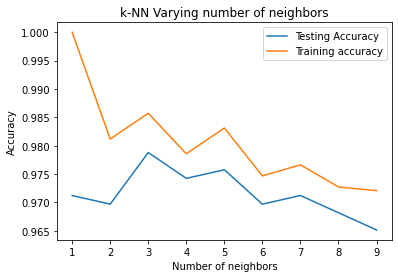

In [31]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)
    
    
    #Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

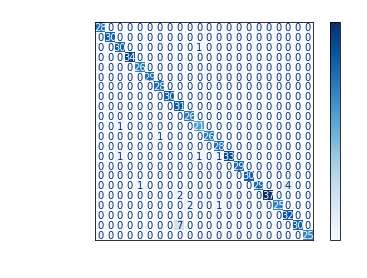

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'white'
matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

Text(0, 0.5, 'Error Rate')

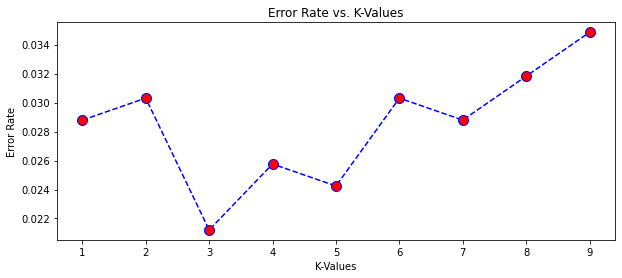

In [33]:
error_rate = []
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
    
plt.figure(figsize=(10,4))
plt.plot(range(1,10), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Error Rate')

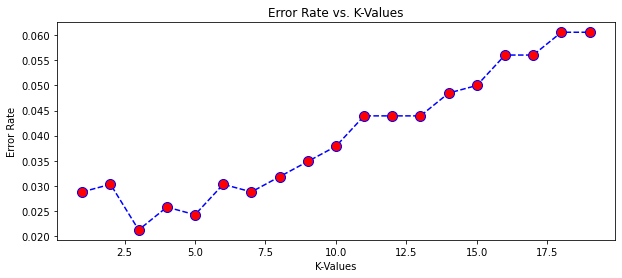

In [34]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
    
plt.figure(figsize=(10,4))
plt.plot(range(1,20), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

In [35]:
from sklearn.model_selection import GridSearchCV

grid = {"n_neighbors":np.arange(1,10)}
knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, grid, cv=10)#GridSearchCV
knn_cv.fit(X_train,y_train)

#%% print hyperparameter KNN algoritmasindaki K degeri
print("tuned hyperparameter K: ",knn_cv.best_params_)
print("tuned parametreye göre en iyi accuracy (best score): ",knn_cv.best_score_)

tuned hyperparameter K:  {'n_neighbors': 3}
tuned parametreye göre en iyi accuracy (best score):  0.9733766233766236


In [36]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
predict=DT.predict(X_test)

In [37]:
path = DT.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [38]:
from sklearn.metrics import accuracy_score
accuracy_train,accuracy_test=[],[]
for i in ccp_alphas:
    DT_clf=DecisionTreeClassifier(ccp_alpha=i)
    DT_clf.fit(X_train,y_train)
    y_pred_train=DT_clf.predict(X_train)
    y_pred_test=DT_clf.predict(X_test)
    accuracy_train.append(accuracy_score(y_train,y_pred_train))
    accuracy_test.append(accuracy_score(y_test,y_pred_test))

<function matplotlib.pyplot.show(close=None, block=None)>

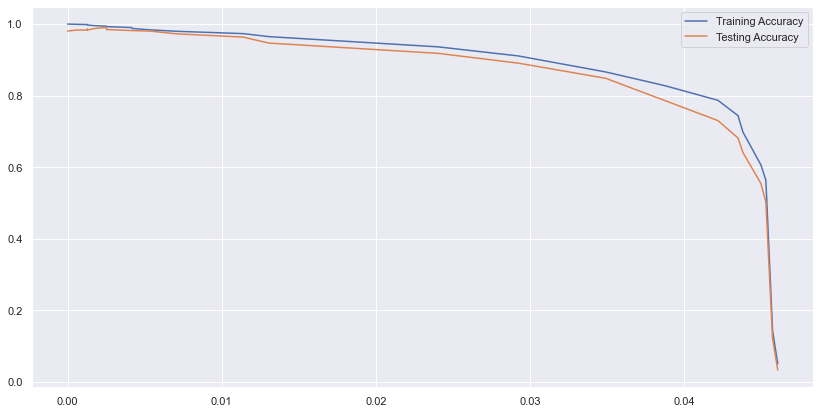

In [39]:
import seaborn as sns
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=ccp_alphas,label="Training Accuracy")
sns.lineplot(y=accuracy_test,x=ccp_alphas,label="Testing Accuracy ")
plt.show

In [40]:
DT_clf=DecisionTreeClassifier(ccp_alpha=0.006,random_state=42)
DT_clf.fit(X_train,y_train)
y_pred_train=DT_clf.predict(X_train)
y_pred_test=DT_clf.predict(X_test)
print("Training Accuracy=",accuracy_score(y_train,y_pred_train),"\n Testing Accuracy=",accuracy_score(y_test,y_pred_test))

Training Accuracy= 0.9837662337662337 
 Testing Accuracy= 0.9772727272727273


[[28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  1  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 31  0  0  0  0  0  0  0  0  2  0  0  8  0]
 [ 0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 21  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 28  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 33  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

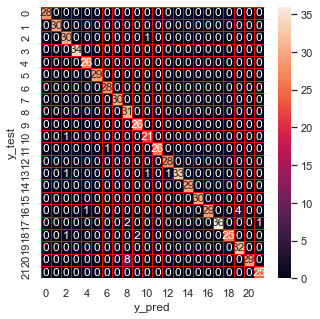

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix 
mat = confusion_matrix(y_pred, y_test)
print(mat)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt =".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

In [42]:
from sklearn.tree import DecisionTreeClassifier
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(X_train, y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.031818, Meilleur paramètre = {'max_depth': 9}


In [43]:
from sklearn.model_selection import GridSearchCV
#définition du dictionnaire des paramètres:
grid_params ={
    'max_depth': np.arange(1, 100),
    'criterion' : ['entropy','gini']
}
grid = GridSearchCV( DecisionTreeClassifier(), grid_params, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [44]:
grid.best_score_

0.9883116883116884

In [45]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 66}

In [46]:
#import matplotlib.pyplot as plt

#x=(model1,model2,model3)
#y =  accuracy_score(y_test, y_pred)
#model = ['arbre', 'random', 'k-nn',]
#plt.bar(x,y, tick_label = (model1,model2,model3),
#width = 0.8, color = ['red', 'green'])
#plt.xlabel('x')
#plt.ylabel('y')
#plt.title('My bar chart!')
#plt.show()

KNN: 0.968000 (0.032496)
CART: 0.848000 (0.073321)
RF: 0.950000 (0.048785)


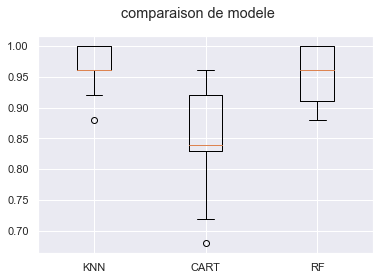

In [47]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# prepare configuration for cross validation test harness
seed = 3
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0,)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,)
	cv_results = model_selection.cross_val_score(model, X, y, cv=20, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('comparaison de modele ')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()